In [1]:
import os
import yaml
import torch

from airdetect.aircraft_detector import visualize_predictions

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.ion()

In [2]:
with open('../config.yaml', 'r') as config_file:
    config = yaml.load(config_file, Loader=yaml.Loader)

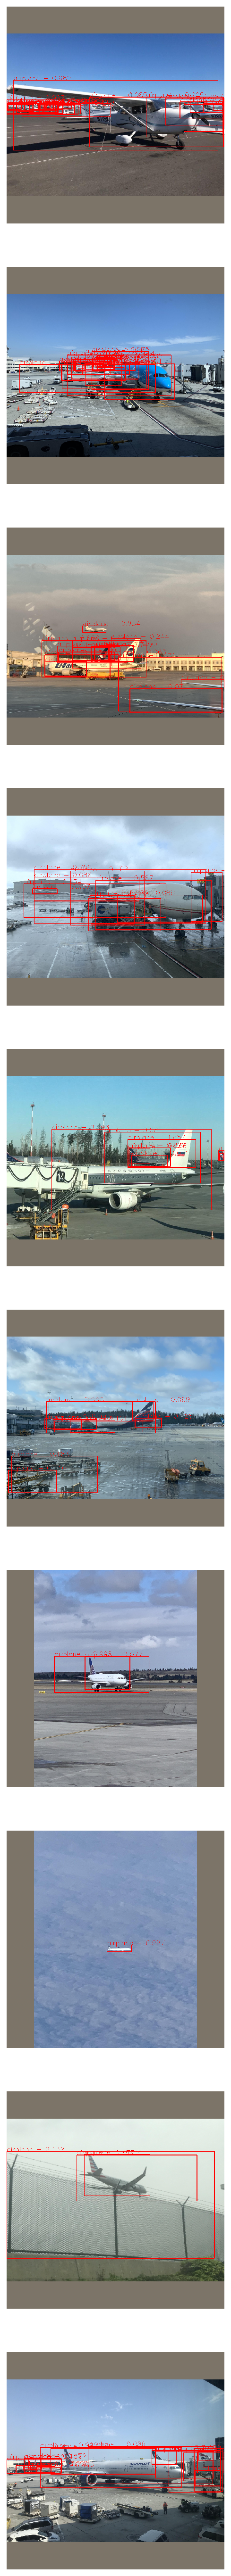

In [3]:
visualize_predictions(dataset_config=config['datasets']['reallife'],
                      device=0,
                      samples=10,
                      min_score=0.0,
                      top_bboxes=1000, 
                      categories=['airplane'], 
                      directory='/data/ssd/run/airdetect/debug')
